## PCA

In [2]:
# 경고 문구 없애기
import warnings
warnings.filterwarnings('ignore') 

### 1. 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 한글포트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','000660.KS','207940.KS','005380.KS',
                           '068270.KS','000270.KS','105560.KS','035420.KS','005490.KS'}, '2020-01-01', '2023-12-31')

# 수정종가 데이터 가져오기
df = stock_price['Adj Close']
# 수익률 데이터로 변경하기
df = stock_price["Adj Close"].pct_change()*100
df = df.dropna()
# 편의를 위한 컬럼명 변경
df.columns = ['기아',"SK하이닉스","현대차","POSCO 홀딩스","삼성전자", "NAVER", "셀트리온", "KB금융", "삼성 바이오로직스"]

[***********           22%%                      ]  2 of 9 completed

[*********************100%%**********************]  9 of 9 completed


### 2. PCA 구현하기

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA 모델 생성 (주성분의 수는 데이터 차원보다 작게 설정)
pca = PCA(n_components=9)  # 설명 변수가 9개이므로 최대 9를 보면서 어떻게 변하는지 지켜보기
pca_result = pca.fit_transform(df)

# 주성분의 설명 분산 비율
explained_variance = pca.explained_variance_ratio_
explained_variance_ratio = explained_variance
cumulative_variance_ratio = np.cumsum(explained_variance)
# 결과 출력 각 주성분의 개수에 따른 설명 분산 출력
print(f'Explained variance ratios: {explained_variance}')

# 설명변수 누적합 출력
print(f'Cumulative explained variance: {np.cumsum(explained_variance)}')

Explained variance ratios: [0.39628765 0.1623158  0.10461327 0.10333399 0.06873325 0.06063951
 0.05825204 0.02641685 0.01940763]
Cumulative explained variance: [0.39628765 0.55860345 0.66321672 0.76655071 0.83528396 0.89592347
 0.95417552 0.98059237 1.        ]


### 3. PCA_DF 확인하기

In [15]:
# 주성분 데이터프레임 생성
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.778651,-1.224901,0.866323,1.838579,0.662673,-1.330728,0.368190,-0.174912,0.798347
1,-3.353649,-1.710904,1.462569,-2.112801,0.452912,-0.564059,-0.605332,0.365244,0.253980
2,2.746397,3.102240,0.693189,0.349785,-2.178734,-1.020385,0.764488,-0.562345,0.494514
3,-3.786089,-1.377374,4.155974,0.563327,3.923781,1.026751,-1.804857,-0.966088,1.040341
4,3.723214,2.380579,1.339979,2.961241,0.207867,1.365503,0.485897,0.751466,1.900474
...,...,...,...,...,...,...,...,...,...
979,-1.325472,0.415667,-0.674831,-1.438709,1.923491,-0.784261,-0.654285,-0.219786,0.500770
980,-0.871334,-0.160188,0.478419,-1.333281,0.675125,1.662888,0.678047,0.233460,1.087972
981,0.610391,1.641283,0.042725,-1.342550,0.714745,-0.626074,-0.186036,-0.377485,0.865558
982,3.485411,0.230046,1.230228,2.304332,-3.533882,0.870773,-0.734961,-0.358203,1.944467


### 4. 최적 주성분 개수 찾기

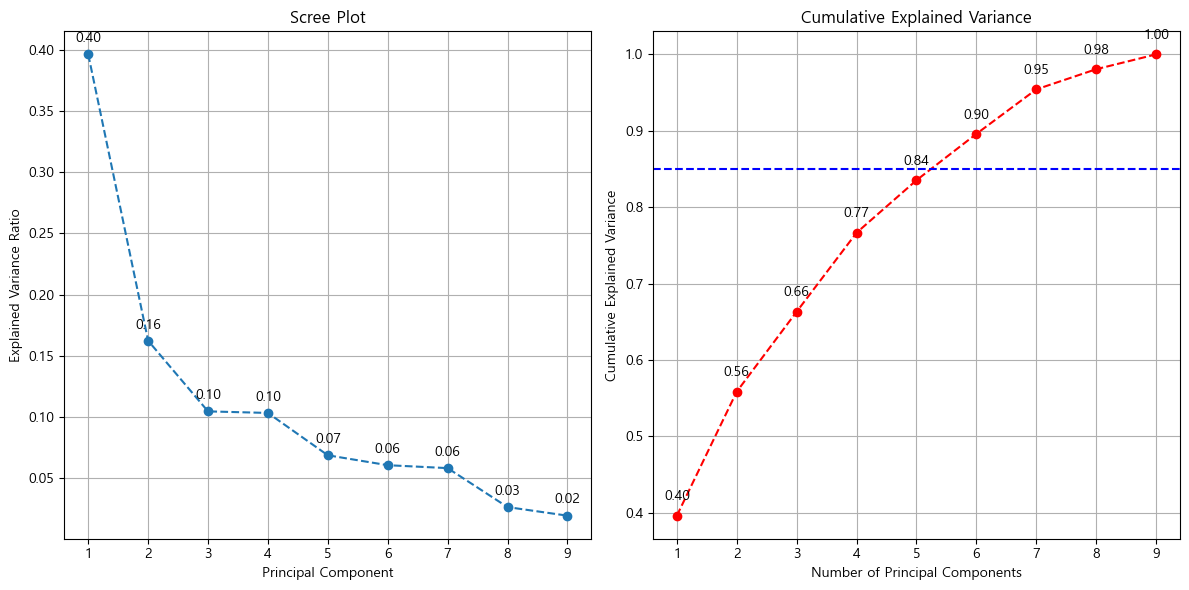

In [16]:
# 85% 이상 되는 주성분 개수 결정
num_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

# 스크리 도표와 누적 기여율 시각화
plt.figure(figsize=(12, 6))

# 스크리 도표
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
for i, v in enumerate(explained_variance_ratio):
    plt.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)

# 누적 기여율
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='r')
for i, v in enumerate(cumulative_variance_ratio):
    plt.text(i + 1, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
plt.axhline(y=0.85, color='b', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

### 5. 최적 주성분 개수로 진행

In [18]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# PCA 모델 생성 (주성분의 수는 데이터 차원보다 작게 설정)
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(df)

# 주성분의 설명 분산 비율
explained_variance = pca.explained_variance_ratio_

# 결과 출력 각 주성분의 개수에 따른 설명 분산 출력
print(f'Explained variance ratios: {explained_variance}')

# 설명변수 누적합 출력
print(f'Cumulative explained variance: {np.cumsum(explained_variance)}')


# 주성분 데이터프레임 생성
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df.head()


Explained variance ratios: [0.39628765 0.1623158 ]
Cumulative explained variance: [0.39628765 0.55860345]


,PC1,PC2
0,-1.778651,-1.224901
1,-3.353649,-1.710904
2,2.746397,3.102240
3,-3.786089,-1.377374
4,3.723214,2.380579
